In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('tweets.csv')
data

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [3]:
data49 = data.head(150)

In [4]:
data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [5]:
data.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [6]:
data.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


In [7]:
data.location.fillna("No Location" , inplace= True)

In [8]:
data.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [9]:
Real_len = data[data['target'] == 1].shape[0]
Not_len = data[data['target'] == 0].shape[0]

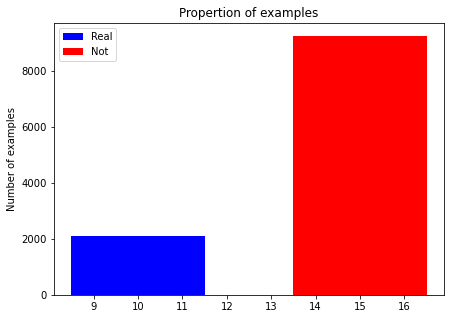

In [10]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

In [11]:
data_0 = data[data['target']==0]
data_1 = data[data['target']==1]
data_0_sampled = data_0.sample(data.target.value_counts()[1])
data_0_sampled

,id,keyword,location,text,target
5461,5461,fatality,No Location,Who’s fatality is this tho ????,0
2179,2179,catastrophic,No Location,Australian fiction is already challenging the ...,0
9388,9388,snowstorm,No Location,Dude made his wife get off the plane for his s...,0
4849,4849,emergency%20services,No Location,This evening a crew from #York was called to t...,0
3410,3410,demolish,Ethiopia,honestly I don't know really what you're getti...,0
...,...,...,...,...,...
5946,5946,floods,"Madrid, España",I want to help you with my proje… https://t.co...,0
8431,8431,razed,Glebe NSW Australia,It's here! This book is my heart spilled all o...,0
9256,9256,sirens,No Location,Dude the creature design for Sirens in Witcher...,0
5389,5389,fatalities,"Rwanda, Africa",I am very worried for this woman and her child...,0


In [12]:
frames = [data_1,data_0_sampled]
data = pd.concat(frames)
data

,id,keyword,location,text,target
0,0,ablaze,No Location,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,No Location,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1
...,...,...,...,...,...
5946,5946,floods,"Madrid, España",I want to help you with my proje… https://t.co...,0
8431,8431,razed,Glebe NSW Australia,It's here! This book is my heart spilled all o...,0
9256,9256,sirens,No Location,Dude the creature design for Sirens in Witcher...,0
5389,5389,fatalities,"Rwanda, Africa",I am very worried for this woman and her child...,0


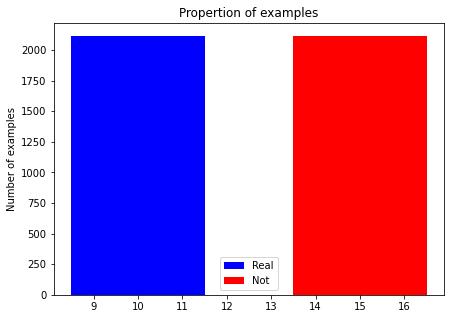

In [13]:
Real_len = data[data['target'] == 1].shape[0]
Not_len = data[data['target'] == 0].shape[0]
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

In [14]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\MONIT\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [15]:
def length(string):    
    return len(string)
data['length'] = data['text'].apply(length)

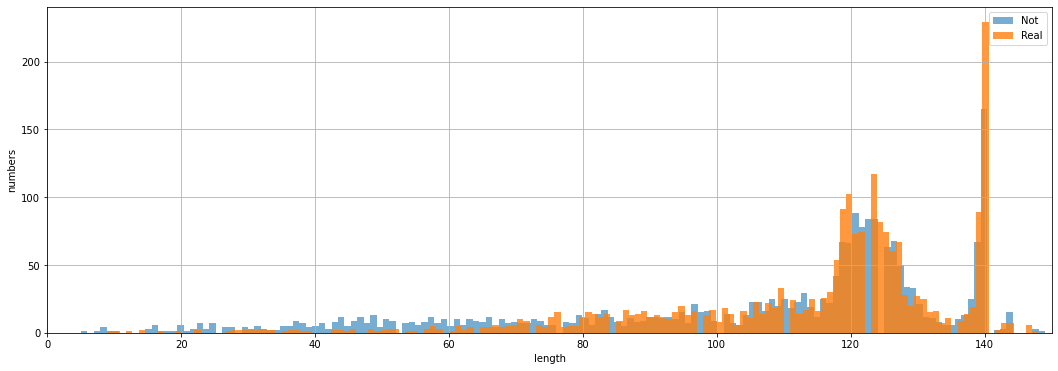

In [16]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(data[data['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(data[data['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

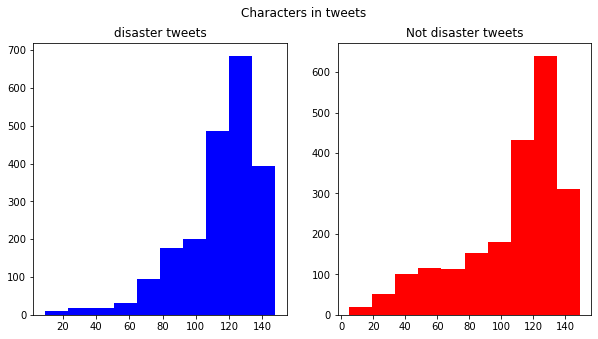

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data[data['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=data[data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [18]:
data.duplicated()

0       False
1       False
2       False
3       False
6       False
        ...  
5946    False
8431    False
9256    False
5389    False
1676    False
Length: 4228, dtype: bool

In [19]:
#Count of duplicated rows
data[data.duplicated()].sum()

id          0.0
keyword     0.0
location    0.0
text        0.0
target      0.0
length      0.0
dtype: float64

In [20]:
data[~data.duplicated()]

,id,keyword,location,text,target,length
0,0,ablaze,No Location,"Communal violence in Bhainsa, Telangana. ""Ston...",1,125
1,1,ablaze,No Location,Telangana: Section 144 has been imposed in Bha...,1,131
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,63
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,87
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1,139
...,...,...,...,...,...,...
5946,5946,floods,"Madrid, España",I want to help you with my proje… https://t.co...,0,57
8431,8431,razed,Glebe NSW Australia,It's here! This book is my heart spilled all o...,0,116
9256,9256,sirens,No Location,Dude the creature design for Sirens in Witcher...,0,122
5389,5389,fatalities,"Rwanda, Africa",I am very worried for this woman and her child...,0,136


In [21]:
import re
data.text = data.text.apply(lambda x: re.sub('[^a-zA-Z ]',"",x))
data.keyword= data.keyword.apply(lambda x: re.sub('[^a-zA-Z ]',"",x))

In [22]:
data

,id,keyword,location,text,target,length
0,0,ablaze,No Location,Communal violence in Bhainsa Telangana Stones ...,1,125
1,1,ablaze,No Location,Telangana Section has been imposed in Bhainsa...,1,131
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership httpst...,1,63
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership httpst...,1,87
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1,139
...,...,...,...,...,...,...
5946,5946,floods,"Madrid, España",I want to help you with my proje httpstcocwDxeQZo,0,57
8431,8431,razed,Glebe NSW Australia,Its here This book is my heart spilled all ove...,0,116
9256,9256,sirens,No Location,Dude the creature design for Sirens in Witcher...,0,122
5389,5389,fatalities,"Rwanda, Africa",I am very worried for this woman and her child...,0,136


In [23]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MONIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [25]:
data.text = data.text.apply(lambda x : x.split())
data.keyword=data.keyword.apply(lambda x: x.lower())

In [26]:
data.head()

,id,keyword,location,text,target,length
0,0,ablaze,No Location,"[Communal, violence, in, Bhainsa, Telangana, S...",1,125
1,1,ablaze,No Location,"[Telangana, Section, has, been, imposed, in, B...",1,131
2,2,ablaze,New York City,"[Arsonist, sets, cars, ablaze, at, dealership,...",1,63
3,3,ablaze,"Morgantown, WV","[Arsonist, sets, cars, ablaze, at, dealership,...",1,87
6,6,ablaze,"London, England","[Several, houses, have, been, set, ablaze, in,...",1,139


In [27]:
data['word_count'] = data.text.apply(lambda x : len(str(x).split(',')))

In [28]:
data.head()

,id,keyword,location,text,target,length,word_count
0,0,ablaze,No Location,"[Communal, violence, in, Bhainsa, Telangana, S...",1,125,19
1,1,ablaze,No Location,"[Telangana, Section, has, been, imposed, in, B...",1,131,19
2,2,ablaze,New York City,"[Arsonist, sets, cars, ablaze, at, dealership,...",1,63,7
3,3,ablaze,"Morgantown, WV","[Arsonist, sets, cars, ablaze, at, dealership,...",1,87,8
6,6,ablaze,"London, England","[Several, houses, have, been, set, ablaze, in,...",1,139,21


In [29]:
data.text=data.text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])
data['word_count2'] = data.text.apply(lambda x : len(str(x).split(',')))

In [30]:
data.head()

,id,keyword,location,text,target,length,word_count,word_count2
0,0,ablaze,No Location,"[Communal, violence, Bhainsa, Telangana, Stone...",1,125,19,12
1,1,ablaze,No Location,"[Telangana, Section, imposed, Bhainsa, January...",1,131,19,11
2,2,ablaze,New York City,"[Arsonist, sets, cars, ablaze, dealership, htt...",1,63,7,6
3,3,ablaze,"Morgantown, WV","[Arsonist, sets, cars, ablaze, dealership, htt...",1,87,8,7
6,6,ablaze,"London, England","[Several, houses, set, ablaze, Ngemsibaa, vill...",1,139,21,14


In [31]:
ps = PorterStemmer()

In [32]:
data.text=data.text.apply(lambda x: [ps.stem(word) for word in x])

In [33]:
data.head()

,id,keyword,location,text,target,length,word_count,word_count2
0,0,ablaze,No Location,"[commun, violenc, bhainsa, telangana, stone, p...",1,125,19,12
1,1,ablaze,No Location,"[telangana, section, impos, bhainsa, januari, ...",1,131,19,11
2,2,ablaze,New York City,"[arsonist, set, car, ablaz, dealership, httpst...",1,63,7,6
3,3,ablaze,"Morgantown, WV","[arsonist, set, car, ablaz, dealership, httpst...",1,87,8,7
6,6,ablaze,"London, England","[sever, hous, set, ablaz, ngemsibaa, villag, o...",1,139,21,14


In [34]:
data.text = data.text.apply(lambda x: " ".join(x))

In [35]:
data

,id,keyword,location,text,target,length,word_count,word_count2
0,0,ablaze,No Location,commun violenc bhainsa telangana stone pelt mu...,1,125,19,12
1,1,ablaze,No Location,telangana section impos bhainsa januari clash ...,1,131,19,11
2,2,ablaze,New York City,arsonist set car ablaz dealership httpstcogoqv...,1,63,7,6
3,3,ablaze,"Morgantown, WV",arsonist set car ablaz dealership httpstcoglnu...,1,87,8,7
6,6,ablaze,"London, England",sever hous set ablaz ngemsibaa villag oku sub ...,1,139,21,14
...,...,...,...,...,...,...,...,...
5946,5946,floods,"Madrid, España",i want help proje httpstcocwdxeqzo,0,57,9,5
8431,8431,razed,Glebe NSW Australia,it thi book heart spill page broken fear hope ...,0,116,22,11
9256,9256,sirens,No Location,dude creatur design siren witcher absolut blew...,0,122,22,14
5389,5389,fatalities,"Rwanda, Africa",i worri woman children thi kind abus usual end...,0,136,22,13


C:\Users\MONIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MONIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 keywords for non-disaster tweets')

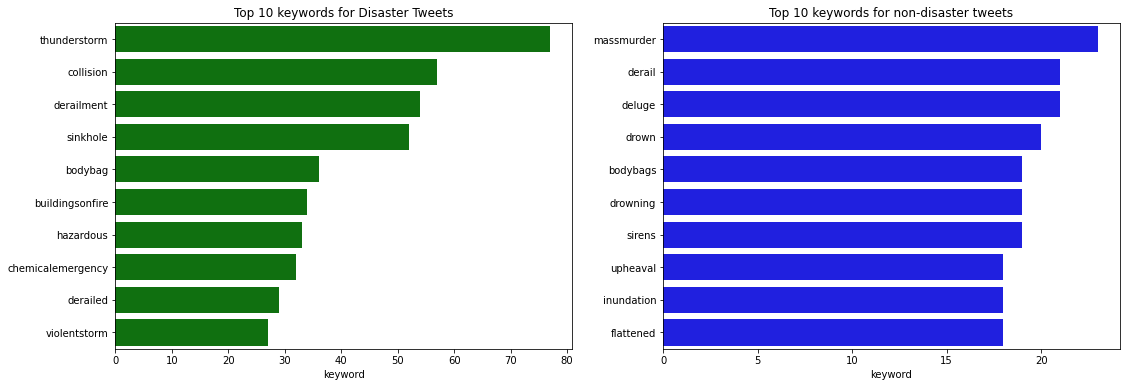

In [36]:
disaster = data[data['target']==1]
non_disaster = data[data['target']==0]

keywords_disaster = disaster.keyword.value_counts().head(10)
keywords_non_disaster = non_disaster.keyword.value_counts().head(10)

plt.figure(figsize=(18,6))
plt.subplot(121)
sns.barplot(keywords_disaster, keywords_disaster.index, color='g')
plt. title('Top 10 keywords for Disaster Tweets')

plt.subplot(122)
sns.barplot(keywords_non_disaster, keywords_non_disaster.index, color='b')
plt.title('Top 10 keywords for non-disaster tweets')

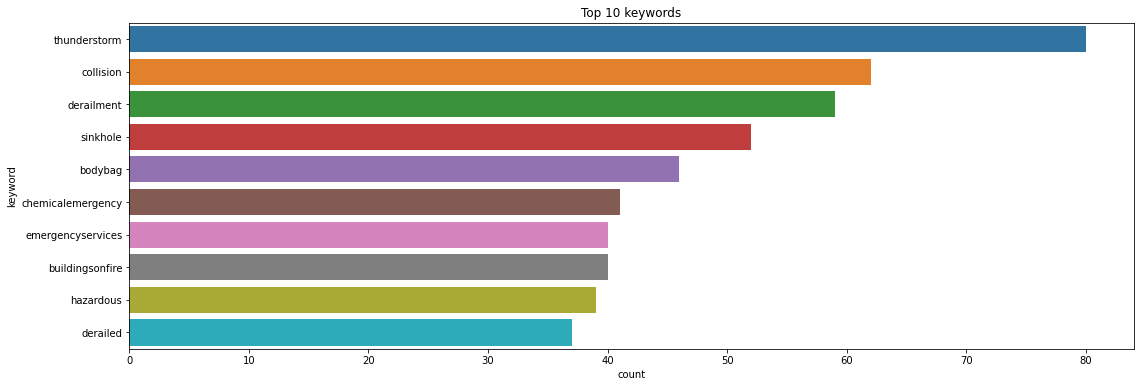

In [37]:
# Exploring Keywords and their distribution
sns.countplot(y=data.keyword, order = data.keyword.value_counts().iloc[:10].index)
plt.title('Top 10 keywords')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MONIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


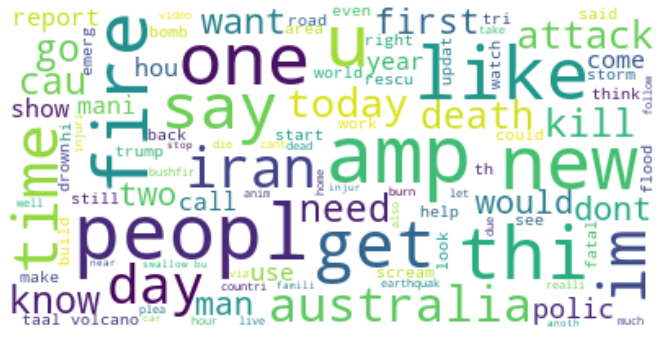

In [38]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

from wordcloud import WordCloud # Word Cloud library
# word cloud distribution
texts = " ".join(i for i in data.text)
wc = WordCloud(max_words=100,background_color= "white", max_font_size=50, stopwords=stop)
wc.generate(texts)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

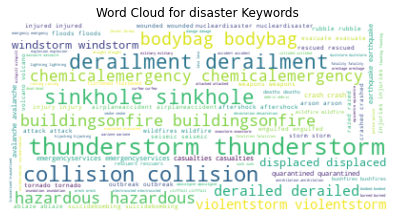

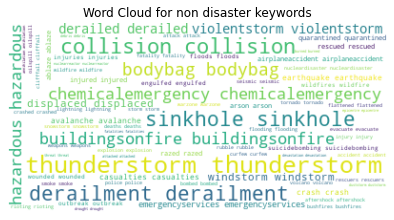

In [39]:
#checking distribution of disaster and non disaster tweets using matplotlib
disaster_tweets = " ".join(i for i in data[data['target']==1].keyword)
wc = WordCloud(max_words=100,background_color= "white", max_font_size=50, stopwords=stop)
wc.generate(disaster_tweets)
plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for disaster Keywords')
plt.show()

non_disaster_tweets = " ".join(i for i in data[data['target']==0].keyword)
wc = WordCloud(max_words=100,background_color= "white", max_font_size=50, stopwords=stop)
wc.generate(disaster_tweets)
plt.figure(figsize=(15, 15))
plt.subplot(122)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for non disaster keywords')
plt.show()

In [40]:
X=data["text"]
y=data['target']

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tv = TfidfVectorizer(stop_words='english')

In [43]:
X = tv.fit_transform(X)
X=pd.DataFrame(X.todense(),columns=tv.get_feature_names())

In [44]:
X.head()

,aab,aaron,aaronjayjack,aayega,ab,abandon,abbey,abbot,abbotsford,abbott,...,zionism,zionist,zip,zombi,zone,zoo,zoomedin,zorro,zuckerberg,zulaikha
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) 

In [47]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [49]:
Model = ComplementNB()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
y_prob = Model.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred)) # gives summary of precision, recall, f1-score, support
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_prob) # gives false positive rates, true positive rates and thresholds between fpr and tpr
r = auc(fpr, tpr)
print('AUC:', r)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       633
           1       0.79      0.85      0.82       636

    accuracy                           0.81      1269
   macro avg       0.81      0.81      0.81      1269
weighted avg       0.81      0.81      0.81      1269

Confusion Matrix:
[[485 148]
 [ 95 541]]
AUC: 0.8928184645344619


In [50]:
def preprocess(x):
         x=re.sub('[^a-zA-Z ]', ' ', x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x
    
data49["text"]=data49["text"].apply(preprocess)

<ipython-input-50-7ca090aa476d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data49["text"]=data49["text"].apply(preprocess)


In [51]:
X = tv.transform(data49['text'])
X=pd.DataFrame(X.todense(),columns=tv.get_feature_names())

In [52]:
X

,aab,aaron,aaronjayjack,aayega,ab,abandon,abbey,abbot,abbotsford,abbott,...,zionism,zionist,zip,zombi,zone,zoo,zoomedin,zorro,zuckerberg,zulaikha
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
Model.predict(X)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)